In [499]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

import os
%matplotlib inline
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from statsmodels.tsa import stattools
from statsmodels.tsa import seasonal

In [500]:
os.chdir('/home/ishta/Analyzing-and-predicting-the-volatile-market-patterns-for-trading/Notebooks_time_series')

In [501]:
data = pd.read_csv('Datasets/eurusd_hour.csv')

In [502]:
print('Column names:', data.columns)

Column names: Index(['Date', 'Time', 'BO', 'BH', 'BL', 'BC', 'BCh', 'AO', 'AH', 'AL', 'AC',
       'ACh'],
      dtype='object')


In [503]:
data

,Date,Time,BO,BH,BL,BC,BCh,AO,AH,AL,AC,ACh
0,2005-05-02,00:00,1.28520,1.28520,1.28400,1.28440,-0.00080,1.28540,1.28540,1.28420,1.28460,-0.00080
1,2005-05-02,01:00,1.28440,1.28480,1.28390,1.28420,-0.00020,1.28460,1.28500,1.28410,1.28440,-0.00020
2,2005-05-02,02:00,1.28430,1.28540,1.28410,1.28510,0.00080,1.28450,1.28560,1.28430,1.28530,0.00080
3,2005-05-02,03:00,1.28510,1.28590,1.28500,1.28510,0.00000,1.28530,1.28610,1.28520,1.28530,0.00000
4,2005-05-02,04:00,1.28520,1.28590,1.28490,1.28550,0.00030,1.28540,1.28610,1.28510,1.28570,0.00030
...,...,...,...,...,...,...,...,...,...,...,...,...
93079,2020-04-29,18:00,1.08620,1.08851,1.08611,1.08713,0.00093,1.08660,1.08865,1.08640,1.08726,0.00066
93080,2020-04-29,19:00,1.08711,1.08823,1.08659,1.08748,0.00037,1.08725,1.08837,1.08675,1.08760,0.00035
93081,2020-04-29,20:00,1.08747,1.08788,1.08691,1.08708,-0.00039,1.08758,1.08810,1.08706,1.08808,0.00050
93082,2020-04-29,21:00,1.08708,1.08740,1.08699,1.08714,0.00006,1.08808,1.08814,1.08763,1.08766,-0.00042


In [504]:
# Assuming 'Date' and 'Time' columns are in datetime format
if 'Date' in data.columns and 'Time' in data.columns:
    data['DateTime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'])
    data.set_index('DateTime', inplace=True)

# Define the time range
start_time = '2005-01-03 00:00:00'
end_time = '2020-04-03 00:00:00'

# Extract rows within the specified time range
selected_rows = data.loc[start_time:end_time].copy()  # Ensure you have a copy

# Drop rows with empty points (NaN values)
selected_rows.dropna(inplace=True)

# Reset the index if needed
selected_rows.reset_index(inplace=True)

#Change the row indices of the dataframe using the Date column
selected_rows.index = selected_rows['DateTime']

In [505]:
print('Column names:', selected_rows.columns)

Column names: Index(['DateTime', 'Date', 'Time', 'BO', 'BH', 'BL', 'BC', 'BCh', 'AO', 'AH',
       'AL', 'AC', 'ACh'],
      dtype='object')


In [506]:
selected_rows

,DateTime,Date,Time,BO,BH,BL,BC,BCh,AO,AH,AL,AC,ACh
DateTime,,,,,,,,,,,,,
2005-05-02 00:00:00,2005-05-02 00:00:00,2005-05-02,00:00,1.28520,1.28520,1.28400,1.28440,-0.00080,1.28540,1.28540,1.28420,1.28460,-0.00080
2005-05-02 01:00:00,2005-05-02 01:00:00,2005-05-02,01:00,1.28440,1.28480,1.28390,1.28420,-0.00020,1.28460,1.28500,1.28410,1.28440,-0.00020
2005-05-02 02:00:00,2005-05-02 02:00:00,2005-05-02,02:00,1.28430,1.28540,1.28410,1.28510,0.00080,1.28450,1.28560,1.28430,1.28530,0.00080
2005-05-02 03:00:00,2005-05-02 03:00:00,2005-05-02,03:00,1.28510,1.28590,1.28500,1.28510,0.00000,1.28530,1.28610,1.28520,1.28530,0.00000
2005-05-02 04:00:00,2005-05-02 04:00:00,2005-05-02,04:00,1.28520,1.28590,1.28490,1.28550,0.00030,1.28540,1.28610,1.28510,1.28570,0.00030
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-02 20:00:00,2020-04-02 20:00:00,2020-04-02,20:00,1.08489,1.08658,1.08444,1.08545,0.00056,1.08506,1.08678,1.08462,1.08608,0.00102
2020-04-02 21:00:00,2020-04-02 21:00:00,2020-04-02,21:00,1.08540,1.08616,1.08497,1.08511,-0.00029,1.08621,1.08679,1.08587,1.08611,-0.00010
2020-04-02 22:00:00,2020-04-02 22:00:00,2020-04-02,22:00,1.08517,1.08573,1.08492,1.08492,-0.00025,1.08617,1.08617,1.08512,1.08512,-0.00105


In [507]:
#Resample and compute daily mean
daily = selected_rows['BC'].resample('D')
daily_mean = daily.mean()
daily_mean

DateTime
2005-05-02    1.285476
2005-05-03    1.286427
2005-05-04    1.294647
2005-05-05    1.295139
2005-05-06    1.289783
                ...   
2020-03-30    1.105588
2020-03-31    1.099976
2020-04-01    1.096160
2020-04-02    1.089217
2020-04-03    1.084150
Freq: D, Name: BC, Length: 5451, dtype: float64

In [508]:
#Resample and compute weekly mean
weekly = selected_rows['BC'].resample('W')
weekly_mean = weekly.mean()
weekly_mean

DateTime
2005-05-08    1.290077
2005-05-15    1.278198
2005-05-22    1.262473
2005-05-29    1.256319
2005-06-05    1.232454
                ...   
2020-03-08    1.117304
2020-03-15    1.129031
2020-03-22    1.093058
2020-03-29    1.088004
2020-04-05    1.097595
Freq: W-SUN, Name: BC, Length: 779, dtype: float64

In [509]:
#Resample and compute weekly mean
monthly = selected_rows['BC'].resample('M')
monthly_mean = monthly.mean()
monthly_mean

DateTime
2005-05-31    1.269103
2005-06-30    1.216088
2005-07-31    1.204362
2005-08-31    1.229420
2005-09-30    1.225210
                ...   
2019-12-31    1.111151
2020-01-31    1.110017
2020-02-29    1.090648
2020-03-31    1.106493
2020-04-30    1.092514
Freq: M, Name: BC, Length: 180, dtype: float64

In [510]:
#Resample and compute weekly mean
yearly = selected_rows['BC'].resample('Y')
yearly_mean = yearly.mean()
yearly_mean

DateTime
2005-12-31    1.214204
2006-12-31    1.256049
2007-12-31    1.370767
2008-12-31    1.471336
2009-12-31    1.394264
2010-12-31    1.326319
2011-12-31    1.392370
2012-12-31    1.285460
2013-12-31    1.327969
2014-12-31    1.329061
2015-12-31    1.109765
2016-12-31    1.107981
2017-12-31    1.129716
2018-12-31    1.181426
2019-12-31    1.119547
2020-12-31    1.102434
Freq: A-DEC, Name: BC, dtype: float64

Text(0.5, 1.0, 'yearly mean BC')

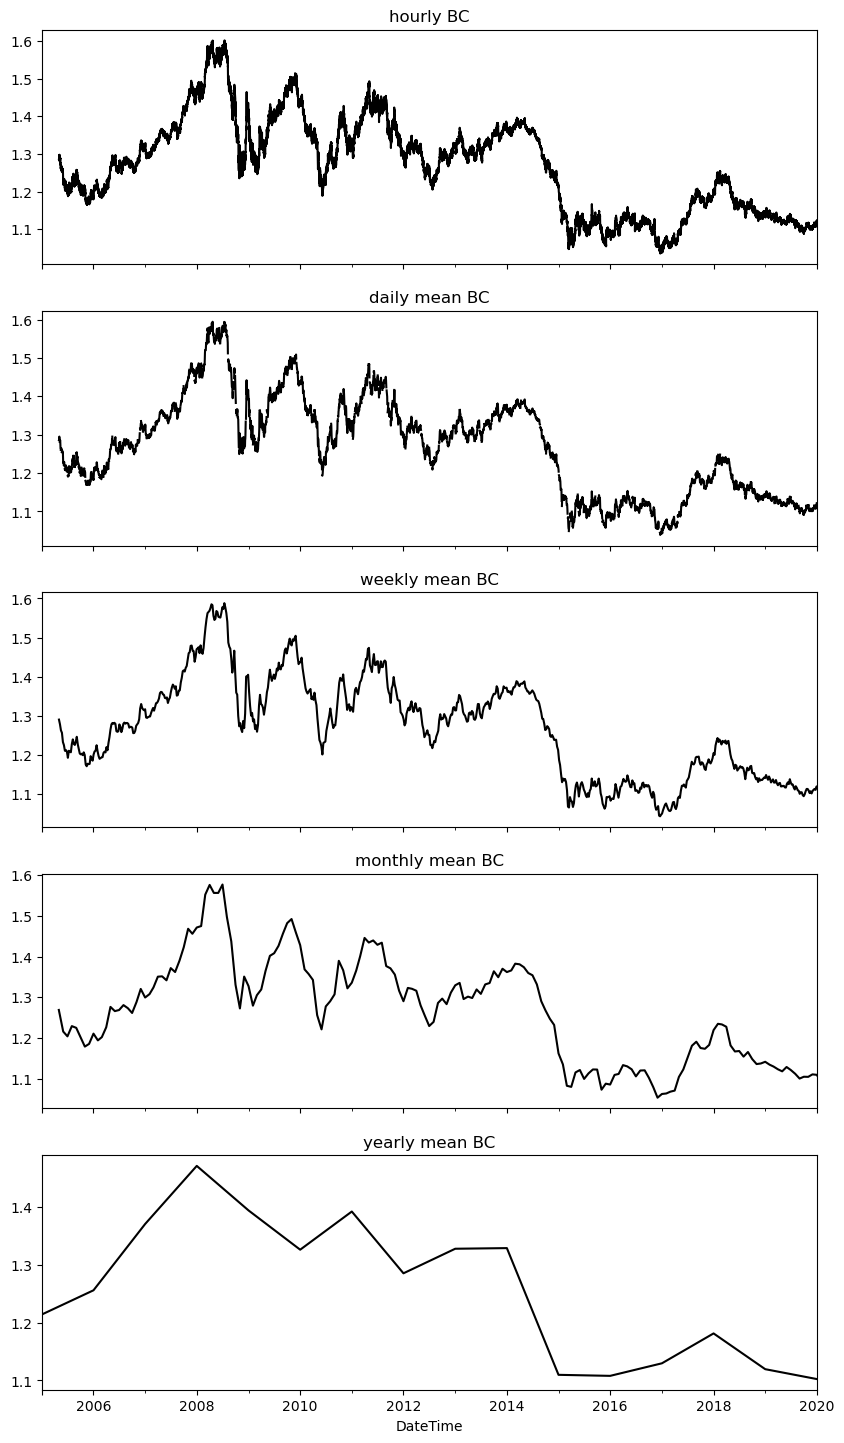

In [511]:
fig, axarr = plt.subplots(5, sharex=True)
fig.set_size_inches(10, 20)

selected_rows['BC'].plot(ax=axarr[0], color='k')
axarr[0].set_title('hourly BC')

daily_mean.plot(ax=axarr[1], color='k')
axarr[1].set_title('daily mean BC')

weekly_mean.plot(ax=axarr[2], color='k')
axarr[2].set_title('weekly mean BC')

monthly_mean.plot(ax=axarr[3], color='k')
axarr[3].set_title('monthly mean BC')

yearly_mean.plot(ax=axarr[4], color='k')
axarr[4].set_title('yearly mean BC')

In [512]:
from statsmodels.tsa.seasonal import STL

In [513]:
stl = STL(monthly_mean)
result = stl.fit()
result

In [514]:
# Size of monthly_mean
size_monthly_mean = len(monthly_mean)
print("Size of monthly_mean:", size_monthly_mean)

Size of monthly_mean: 180


In [515]:
seasonal_additive, trend_additive, residual_additive = result.seasonal , result.trend , result.resid

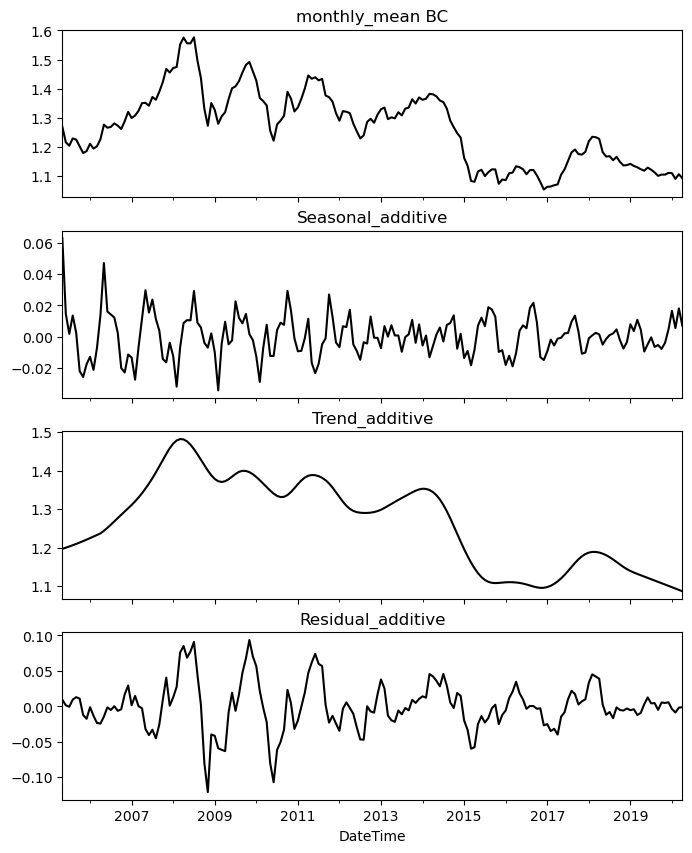

In [516]:
#Plot the original time series, trend, seasonal and random components
fig, axarr = plt.subplots(4, sharex=True)
fig.set_size_inches(8, 10)

monthly_mean.plot(ax=axarr[0], color='k', linestyle='-')
axarr[0].set_title('monthly_mean BC')

seasonal_additive.plot(ax=axarr[1], color='k', linestyle='-')
axarr[1].set_title('Seasonal_additive')

trend_additive.plot(ax=axarr[2], color='k', linestyle='-')
axarr[2].set_title('Trend_additive')

residual_additive.plot(ax=axarr[3], color='k', linestyle='-')
axarr[3].set_title('Residual_additive')

plt.savefig('plots/ch2/B07887_02_22.png', format='png', dpi=300)

# Considering trend cycles

In [624]:
from scipy.fft import fft
from scipy.signal import find_peaks

# Convert DataFrame to NumPy array
trend_additive_for_fourier = trend_additive.to_numpy()

# Perform FFT
fft_result_trend_additive = fft(trend_additive_for_fourier)

# Compute the magnitude spectrum
magnitude_spectrum_trend_additive = np.abs(fft_result_trend_additive)

magnitude_spectrum_trend_additive

array([2.27582218e+02, 1.31170284e+01, 2.43865728e+00, 4.19425339e+00,
       2.50948286e+00, 2.11503479e+00, 1.20228458e+00, 1.66708889e+00,
       6.72024580e-01, 9.70250376e-01, 8.12588025e-01, 6.33619456e-01,
       3.31977037e-01, 2.32670448e-01, 2.29010479e-01, 2.10233340e-01,
       1.93600563e-01, 1.90517780e-01, 1.60115506e-01, 2.02792367e-01,
       9.23307219e-02, 1.61807291e-01, 1.58886485e-01, 1.60126539e-01,
       1.38877440e-01, 1.30686915e-01, 1.29255722e-01, 1.23482194e-01,
       1.20113396e-01, 1.15380290e-01, 1.10801394e-01, 1.07015779e-01,
       1.02758774e-01, 1.00746314e-01, 9.68491063e-02, 9.52584851e-02,
       9.37588894e-02, 8.96780949e-02, 8.87453488e-02, 8.79075573e-02,
       8.88725135e-02, 8.43760431e-02, 8.35222610e-02, 8.22685890e-02,
       8.06665863e-02, 7.89168385e-02, 7.71276237e-02, 7.56462031e-02,
       7.38224556e-02, 7.29460617e-02, 7.12329465e-02, 7.02264658e-02,
       6.94137359e-02, 6.86995357e-02, 6.82624301e-02, 6.73149858e-02,
      

In [625]:
# Find peaks in the magnitude spectrum
peaks_trend_additive, _ = find_peaks(magnitude_spectrum_trend_additive, height=0.05)

In [626]:
peaks_trend_additive

array([  3,   7,   9,  19,  21,  23,  40,  90, 140, 157, 159, 161, 171,
       173, 177])

In [627]:
_

{'peak_heights': array([4.19425339, 1.66708889, 0.97025038, 0.20279237, 0.16180729,
        0.16012654, 0.08887251, 0.055798  , 0.08887251, 0.16012654,
        0.16180729, 0.20279237, 0.97025038, 1.66708889, 4.19425339])}

In [628]:
# Filter peaks based on certain criteria
filtered_peaks_trend_additive = [p for p in peaks_trend_additive if magnitude_spectrum_trend_additive[p] > 0.05]
filtered_peaks_trend_additive

[3, 7, 9, 19, 21, 23, 40, 90, 140, 157, 159, 161, 171, 173, 177]

In [629]:
# Reconstruct signal using the extracted peaks
reconstructed_signal_trend_additive = np.zeros_like(trend_additive_for_fourier, dtype=np.complex128)
reconstructed_signal_trend_additive[filtered_peaks_trend_additive] = fft_result_trend_additive[filtered_peaks_trend_additive]
reconstructed_signal_trend_additive

array([ 0.        +0.j        ,  0.        +0.j        ,
        0.        +0.j        , -3.45930757+2.37169826j,
        0.        +0.j        ,  0.        +0.j        ,
        0.        +0.j        ,  1.15818803-1.19907708j,
        0.        +0.j        , -0.76425094+0.59775103j,
        0.        +0.j        ,  0.        +0.j        ,
        0.        +0.j        ,  0.        +0.j        ,
        0.        +0.j        ,  0.        +0.j        ,
        0.        +0.j        ,  0.        +0.j        ,
        0.        +0.j        ,  0.01755894-0.20203076j,
        0.        +0.j        ,  0.08573528-0.13722631j,
        0.        +0.j        ,  0.06071852-0.14816805j,
        0.        +0.j        ,  0.        +0.j        ,
        0.        +0.j        ,  0.        +0.j        ,
        0.        +0.j        ,  0.        +0.j        ,
        0.        +0.j        ,  0.        +0.j        ,
        0.        +0.j        ,  0.        +0.j        ,
        0.        +0.j        ,

In [630]:
#Zero-pad the reconstructed_signal to achieve the desired size
padded_signal_trend_additive = np.pad(reconstructed_signal_trend_additive, (1, 1), mode='constant')
padded_signal_trend_additive

array([ 0.        +0.j        ,  0.        +0.j        ,
        0.        +0.j        ,  0.        +0.j        ,
       -3.45930757+2.37169826j,  0.        +0.j        ,
        0.        +0.j        ,  0.        +0.j        ,
        1.15818803-1.19907708j,  0.        +0.j        ,
       -0.76425094+0.59775103j,  0.        +0.j        ,
        0.        +0.j        ,  0.        +0.j        ,
        0.        +0.j        ,  0.        +0.j        ,
        0.        +0.j        ,  0.        +0.j        ,
        0.        +0.j        ,  0.        +0.j        ,
        0.01755894-0.20203076j,  0.        +0.j        ,
        0.08573528-0.13722631j,  0.        +0.j        ,
        0.06071852-0.14816805j,  0.        +0.j        ,
        0.        +0.j        ,  0.        +0.j        ,
        0.        +0.j        ,  0.        +0.j        ,
        0.        +0.j        ,  0.        +0.j        ,
        0.        +0.j        ,  0.        +0.j        ,
        0.        +0.j        ,

In [631]:
# Inverse FFT to get back to the time domain
reconstructed_time_series_trend_additive = np.real(np.fft.ifft(reconstructed_signal_trend_additive))

# Inverse FFT to get back to the time domain
reconstructed_time_series_1_point_predicted_trend_additive = np.real(np.fft.ifft(padded_signal_trend_additive))

In [632]:
reconstructed_time_series_trend_additive = (reconstructed_time_series_trend_additive + np.mean(trend_additive_for_fourier))
reconstructed_time_series_1_point_predicted_trend_additive = (reconstructed_time_series_1_point_predicted_trend_additive + np.mean(trend_additive_for_fourier))

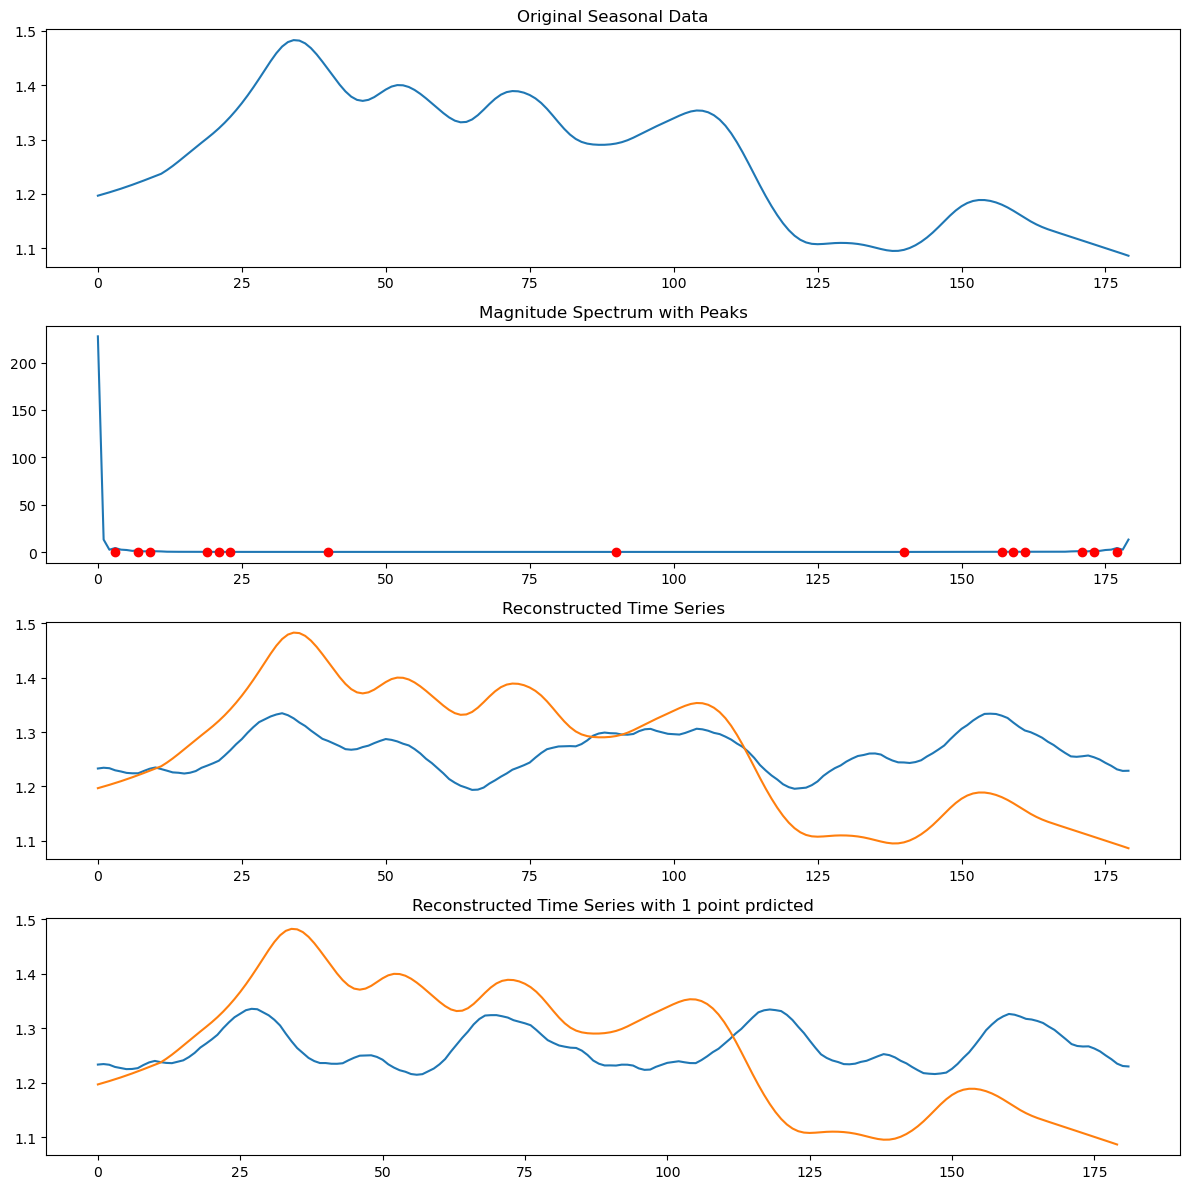

In [633]:
# Plot the results
plt.figure(figsize=(12, 12))

plt.subplot(4, 1, 1)
plt.plot(trend_additive_for_fourier)
plt.title('Original Seasonal Data')

plt.subplot(4, 1, 2)
plt.plot(np.abs(fft_result_trend_additive))
plt.plot(filtered_peaks_trend_additive, magnitude_spectrum[filtered_peaks_trend_additive], 'ro')  # Highlight peaks
plt.title('Magnitude Spectrum with Peaks')

plt.subplot(4, 1, 3)
plt.plot(reconstructed_time_series_trend_additive )
plt.plot(trend_additive_for_fourier)
plt.title('Reconstructed Time Series')

plt.subplot(4, 1, 4)
plt.plot(reconstructed_time_series_1_point_predicted_trend_additive)
plt.plot(trend_additive_for_fourier)
plt.title('Reconstructed Time Series with 1 point prdicted')

plt.tight_layout()
plt.show()

In [634]:
# Size of reconstructed_time_series
size_reconstructed_time_series_trend_additive = len(reconstructed_time_series_trend_additive)
print("Size of Reconstructed Time Series_trend_additive:", size_reconstructed_time_series_trend_additive)

# Size of magnitude_spectrum
size_magnitude_spectrum_trend_additive = len(magnitude_spectrum_trend_additive)
print("Size of Magnitude Spectrum_trend_additive:", size_magnitude_spectrum_trend_additive)

# Size of seasonal_for_fourier
size_trend_additive_for_fourier = len(trend_additive_for_fourier)
print("Size of Original _trend_additive:", size_trend_additive_for_fourier)

# Size of trend_for_fourier
size_padded_signal_trend_additive = len(padded_signal_trend_additive)
print("Size of padded_signal_trend_additive :", size_padded_signal_trend_additive)

# Size of trend_for_fourier
size_reconstructed_time_series_1_point_predicted_trend_additive = len(reconstructed_time_series_1_point_predicted_trend_additive)
print("Size of reconstructed_time_series_1_point_predicted_trend_additive:", size_reconstructed_time_series_1_point_predicted_trend_additive)

Size of Reconstructed Time Series_trend_additive: 180
Size of Magnitude Spectrum_trend_additive: 180
Size of Original _trend_additive: 180
Size of padded_signal_trend_additive : 182
Size of reconstructed_time_series_1_point_predicted_trend_additive: 182


In [635]:
# Make sure both arrays have the same length (up to the 180th point)
reconstructed_time_series_1_point_predicted_to_get_factor_trend_additive = reconstructed_time_series_1_point_predicted_trend_additive[:len(trend_additive_for_fourier)]

# Divide each element of seasonal_for_fourier by the corresponding element of reconstructed_time_series
trend_additive_noice_1 = trend_additive_for_fourier - reconstructed_time_series_trend_additive

# Divide each element of seasonal_for_fourier by the corresponding element of size_reconstructed_time_series_1_point_predicted
trend_additive_noice_2 = trend_additive_for_fourier - reconstructed_time_series_1_point_predicted_to_get_factor_trend_additive


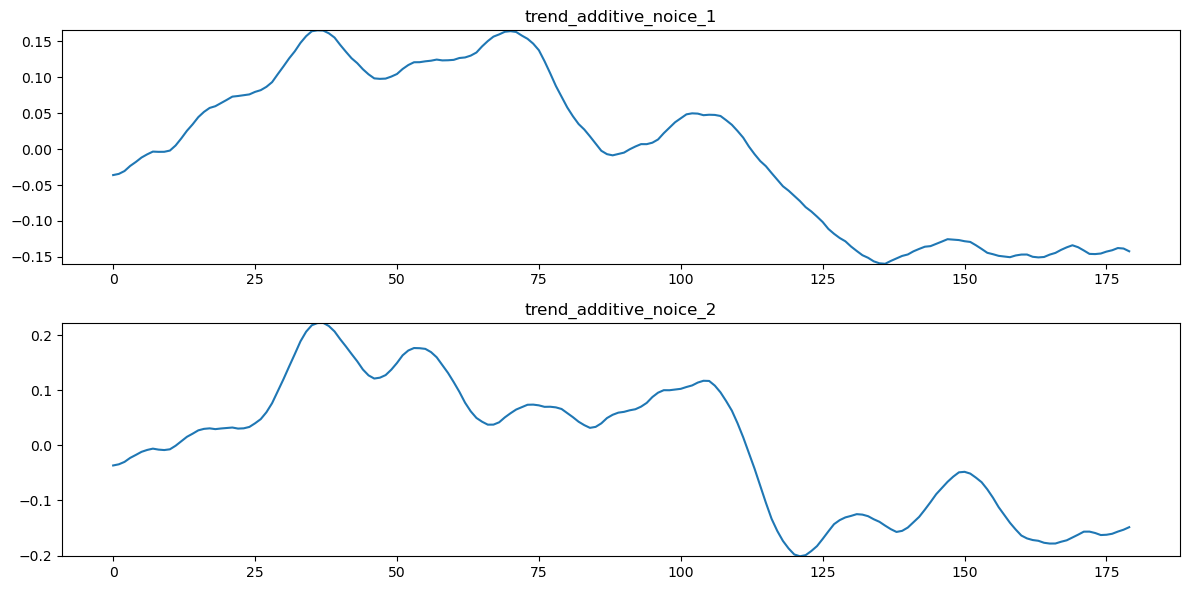

In [636]:
# Plot the results
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(trend_additive_noice_1)
plt.title('trend_additive_noice_1')
plt.ylim(min(trend_additive_noice_1), max(trend_additive_noice_1))  # Set y-axis limits

plt.subplot(2, 1, 2)
plt.plot(trend_additive_noice_2)
plt.title('trend_additive_noice_2')
plt.ylim(min(trend_additive_noice_2), max(trend_additive_noice_2))  # Set y-axis limits

plt.tight_layout()
plt.show()

# Considering Residuals

In [517]:
from statsmodels.tsa.stattools import adfuller

In [518]:
# Perform Augmented Dickey-Fuller test
result = adfuller(residual_additive)

# Extract and print the results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: -3.9025587919255442
p-value: 0.0020160963005289093
Critical Values: {'1%': -3.470616369591229, '5%': -2.8792214018977655, '10%': -2.57619681359045}


In [519]:
import statsmodels.api as sm

acf_result = sm.tsa.acf(residual_additive, fft=False)
pacf_result = sm.tsa.pacf(residual_additive)

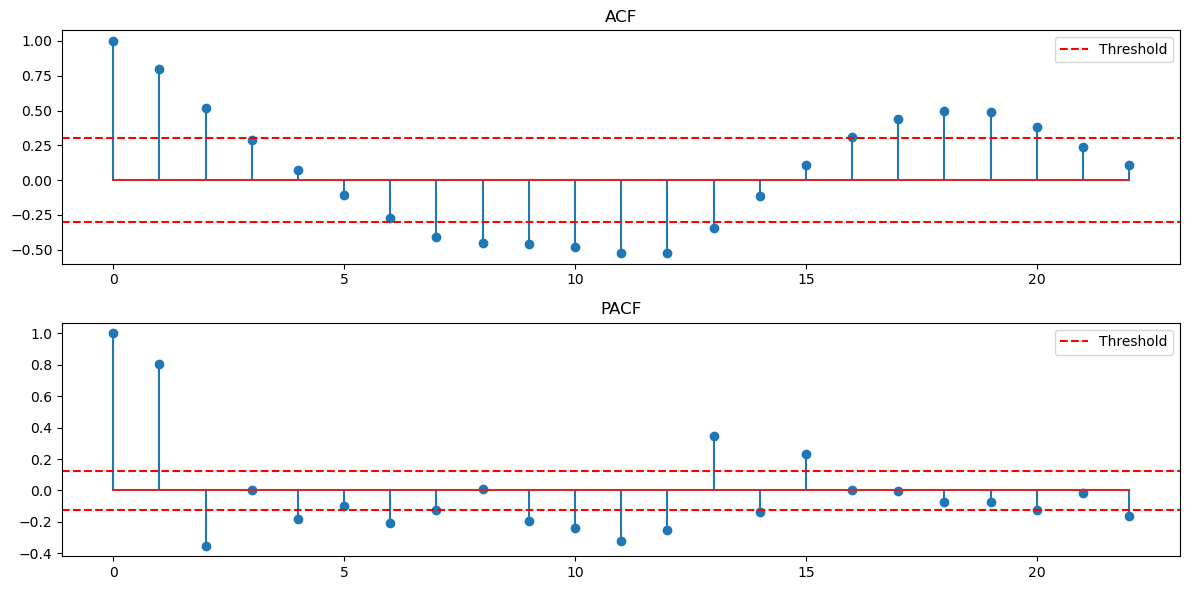

In [520]:
# Set the threshold values
acf_threshold = 0.3  # Replace with your chosen threshold for ACF
pacf_threshold = 0.125  # Replace with your chosen threshold for PACF

# Plot ACF and PACF with threshold lines
plt.figure(figsize=(12, 6))

# ACF Plot
plt.subplot(2, 1, 1)
plt.stem(acf_result)
plt.axhline(y=acf_threshold, color='r', linestyle='--', label='Threshold')
plt.axhline(y=-acf_threshold, color='r', linestyle='--')
plt.title('ACF')
plt.legend()

# PACF Plot
plt.subplot(2, 1, 2)
plt.stem(pacf_result)
plt.axhline(y=pacf_threshold, color='r', linestyle='--', label='Threshold')
plt.axhline(y=-pacf_threshold, color='r', linestyle='--')
plt.title('PACF')
plt.legend()

plt.tight_layout()
plt.show()

In [521]:
absolute_acf_result = np.abs(acf_result)
absolute_pacf_result = np.abs(pacf_result)

relevant_acf_points = np.where(absolute_acf_result > acf_threshold)[0]
relevant_pacf_points = np.where(absolute_pacf_result > pacf_threshold)[0]

print("Relevant ACF Points:", relevant_acf_points)
print("Relevant PACF Points:", relevant_pacf_points)

Relevant ACF Points: [ 0  1  2  7  8  9 10 11 12 13 16 17 18 19 20]
Relevant PACF Points: [ 0  1  2  4  6  7  9 10 11 12 13 14 15 22]


In [522]:
last_acf_point = relevant_acf_points[-1]
last_pacf_point = relevant_pacf_points[-1]

print("Last ACF Point above Threshold:", last_acf_point)
print("Last PACF Point above Threshold:", last_pacf_point)

Last ACF Point above Threshold: 20
Last PACF Point above Threshold: 22


In [523]:
# Assuming you have a variable named 'residual_additive'
# If 'residual_additive' is a NumPy array or a Pandas DataFrame/Series
total_samples = len(residual_additive)

# Set the percentage for training and testing
train_percentage = 0.9

# Calculate the number of samples for training
train_samples = int(train_percentage * total_samples)

# Split the data into training and testing sets
train_set = residual_additive[:train_samples]
test_set = residual_additive[train_samples:]

# Example usage:
print("Training set shape:", train_set.shape)
print("Testing set shape:", test_set.shape)

Training set shape: (162,)
Testing set shape: (18,)


In [572]:
train_set = train_set
train_set

DateTime
2005-05-31    0.938171
2005-06-30    0.153156
2005-07-31   -0.052945
2005-08-31    0.954818
2005-09-30    1.303000
                ...   
2018-06-30   -1.180083
2018-07-31   -0.795535
2018-08-31   -1.665737
2018-09-30   -0.138985
2018-10-31   -0.511507
Freq: M, Name: resid, Length: 162, dtype: float64

In [573]:
test_set = test_set
test_set

DateTime
2018-11-30   -0.584315
2018-12-31   -0.296982
2019-01-31   -0.534752
2019-02-28   -0.402276
2019-03-31   -1.214848
2019-04-30   -0.916321
2019-05-31    0.316404
2019-06-30    1.262809
2019-07-31    0.428814
2019-08-31    0.461422
2019-09-30   -0.488203
2019-10-31    0.549031
2019-11-30    0.487283
2019-12-31    0.578392
2020-01-31   -0.370787
2020-02-29   -0.857179
2020-03-31   -0.179404
2020-04-30   -0.112941
Freq: M, Name: resid, dtype: float64

In [557]:
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm

model = pm.auto_arima(train_set, start_p=3, start_q=3,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=last_acf_point, max_q=last_pacf_point, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=inf, Time=0.28 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=870.692, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=706.042, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=743.424, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=687.833, Time=0.02 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=689.833, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=689.820, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=688.393, Time=0.02 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=inf, Time=0.17 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=689.825, Time=0.03 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0]          
Total fit time: 0.683 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  162
Model:               SARIMAX(2, 0, 0)   Log Likelihood                -340.917
D

In [558]:
model

ARIMA(order=(2, 0, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [559]:
# Get the best-fit parameters
order = model.get_params()['order']

# Retrain the ARIMA model with the best parameters
arima_model = ARIMA(train_set, order=order)
fitted_model = arima_model.fit()

# Forecast future values
forecast_values = fitted_model.forecast(len(test_set))  # Change 'steps' to the number of future steps you want to forecast

print("Forecasted values:", forecast_values)

Forecasted values: 2018-11-30   -0.487621
2018-12-31   -0.335146
2019-01-31   -0.179613
2019-02-28   -0.064583
2019-03-31    0.005932
2019-04-30    0.042456
2019-05-31    0.057650
2019-06-30    0.061524
2019-07-31    0.060509
2019-08-31    0.058100
2019-09-30    0.055860
2019-10-31    0.054276
2019-11-30    0.053339
2019-12-31    0.052871
2020-01-31    0.052689
2020-02-29    0.052653
2020-03-31    0.052676
2020-04-30    0.052713
Freq: M, Name: predicted_mean, dtype: float64


In [560]:
# Perform Augmented Dickey-Fuller test
result = adfuller(forecast_values)

# Extract and print the results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: -1046555074781340.5
p-value: 0.0
Critical Values: {'1%': -4.223238279489106, '5%': -3.189368925619835, '10%': -2.729839421487603}


In [561]:
#get the error
residuals = test_set-forecast_values

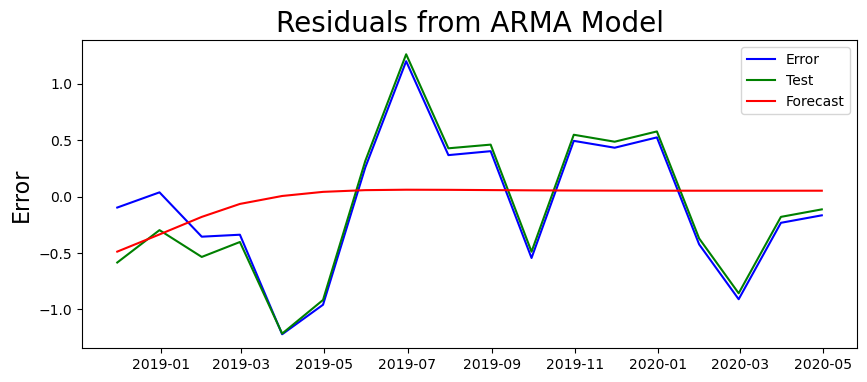

In [563]:
plt.figure(figsize=(10, 4))
plt.plot(residuals, "b", label="Error")
plt.plot(test_set, "g", label="Test")
plt.plot(forecast_values, "r", label="Forecast")
plt.title('Residuals from ARMA Model', fontsize=20)
plt.ylabel('Error', fontsize=16)
plt.legend()  # Add legend for labels
plt.show()

# Forier transform to the seasonal part and model it by extracting the peaks greater than 0.1

In [366]:
from scipy.fft import fft
from scipy.signal import find_peaks

# Convert DataFrame to NumPy array
seasonal_for_fourier = seasonal_additive.to_numpy()

# Perform FFT
fft_result = fft(seasonal_for_fourier)

# Compute the magnitude spectrum
magnitude_spectrum = np.abs(fft_result)

magnitude_spectrum

array([0.07829549, 0.07846903, 0.08076282, 0.07534086, 0.08845028,
       0.07950004, 0.1049523 , 0.07878212, 0.10531396, 0.15457412,
       0.15082995, 0.22484467, 0.06290324, 0.80770561, 0.53014385,
       0.65082776, 0.41697436, 0.17601586, 0.2348046 , 0.06319349,
       0.0459427 , 0.04168569, 0.04864207, 0.0208543 , 0.02848914,
       0.01788305, 0.00729298, 0.06992011, 0.3086164 , 0.05690754,
       0.23819917, 0.36308708, 0.14554763, 0.18370189, 0.01958403,
       0.04772674, 0.03740944, 0.03480566, 0.05353681, 0.03089539,
       0.02942132, 0.07444756, 0.11026203, 0.11304779, 0.06860877,
       0.24756932, 0.41979986, 0.24597151, 0.08254084, 0.09057898,
       0.07182684, 0.05701315, 0.05257625, 0.05012325, 0.06410747,
       0.04093349, 0.04619842, 0.11564926, 0.23475511, 0.18397861,
       0.11383524, 0.1263946 , 0.08463959, 0.13462315, 0.06084878,
       0.05525273, 0.0565022 , 0.04936666, 0.04930874, 0.04271016,
       0.03089608, 0.03588738, 0.07580233, 0.05193684, 0.05925

In [367]:
# Find peaks in the magnitude spectrum
peaks, _ = find_peaks(magnitude_spectrum, height=0.05)

In [368]:
_

{'peak_heights': array([0.08076282, 0.08845028, 0.1049523 , 0.15457412, 0.22484467,
        0.80770561, 0.65082776, 0.2348046 , 0.3086164 , 0.36308708,
        0.18370189, 0.05353681, 0.11304779, 0.41979986, 0.09057898,
        0.06410747, 0.23475511, 0.1263946 , 0.13462315, 0.0565022 ,
        0.07580233, 0.13832572, 0.13181585, 0.05419047, 0.33484581,
        0.33484581, 0.05419047, 0.13181585, 0.13832572, 0.07580233,
        0.0565022 , 0.13462315, 0.1263946 , 0.23475511, 0.06410747,
        0.09057898, 0.41979986, 0.11304779, 0.05353681, 0.18370189,
        0.36308708, 0.3086164 , 0.2348046 , 0.65082776, 0.80770561,
        0.22484467, 0.15457412, 0.1049523 , 0.08845028, 0.08076282])}

In [369]:
peaks

array([  2,   4,   6,   9,  11,  13,  15,  18,  28,  31,  33,  38,  43,
        46,  49,  54,  58,  61,  63,  66,  72,  75,  77,  86,  89,  91,
        94, 103, 105, 108, 114, 117, 119, 122, 126, 131, 134, 137, 142,
       147, 149, 152, 162, 165, 167, 169, 171, 174, 176, 178])

In [370]:
# Filter peaks based on certain criteria
filtered_peaks = [p for p in peaks if magnitude_spectrum[p] > 0.05]
filtered_peaks

[2,
 4,
 6,
 9,
 11,
 13,
 15,
 18,
 28,
 31,
 33,
 38,
 43,
 46,
 49,
 54,
 58,
 61,
 63,
 66,
 72,
 75,
 77,
 86,
 89,
 91,
 94,
 103,
 105,
 108,
 114,
 117,
 119,
 122,
 126,
 131,
 134,
 137,
 142,
 147,
 149,
 152,
 162,
 165,
 167,
 169,
 171,
 174,
 176,
 178]

In [371]:
# Reconstruct signal using the extracted peaks
reconstructed_signal = np.zeros_like(seasonal_for_fourier, dtype=np.complex128)
reconstructed_signal[filtered_peaks] = fft_result[filtered_peaks]
reconstructed_signal

array([ 0.        +0.j        ,  0.        +0.j        ,
        0.08068784+0.00347945j,  0.        +0.j        ,
        0.08675434+0.01723764j,  0.        +0.j        ,
        0.09903679+0.03473758j,  0.        +0.j        ,
        0.        +0.j        ,  0.15395509+0.01381987j,
        0.        +0.j        ,  0.19751853+0.10743162j,
        0.        +0.j        ,  0.33780606+0.73367255j,
        0.        +0.j        ,  0.31362456-0.57027748j,
        0.        +0.j        ,  0.        +0.j        ,
       -0.13868682-0.18947075j,  0.        +0.j        ,
        0.        +0.j        ,  0.        +0.j        ,
        0.        +0.j        ,  0.        +0.j        ,
        0.        +0.j        ,  0.        +0.j        ,
        0.        +0.j        ,  0.        +0.j        ,
        0.27789846+0.13422567j,  0.        +0.j        ,
        0.        +0.j        , -0.05240076-0.35928594j,
        0.        +0.j        ,  0.17788477-0.04586276j,
        0.        +0.j        ,

In [595]:
#Zero-pad the reconstructed_signal to achieve the desired size
padded_signal = np.pad(reconstructed_signal, (1, 1), mode='constant')
padded_signal

array([ 0.        +0.j        ,  0.        +0.j        ,
        0.        +0.j        ,  0.08068784+0.00347945j,
        0.        +0.j        ,  0.08675434+0.01723764j,
        0.        +0.j        ,  0.09903679+0.03473758j,
        0.        +0.j        ,  0.        +0.j        ,
        0.15395509+0.01381987j,  0.        +0.j        ,
        0.19751853+0.10743162j,  0.        +0.j        ,
        0.33780606+0.73367255j,  0.        +0.j        ,
        0.31362456-0.57027748j,  0.        +0.j        ,
        0.        +0.j        , -0.13868682-0.18947075j,
        0.        +0.j        ,  0.        +0.j        ,
        0.        +0.j        ,  0.        +0.j        ,
        0.        +0.j        ,  0.        +0.j        ,
        0.        +0.j        ,  0.        +0.j        ,
        0.        +0.j        ,  0.27789846+0.13422567j,
        0.        +0.j        ,  0.        +0.j        ,
       -0.05240076-0.35928594j,  0.        +0.j        ,
        0.17788477-0.04586276j,

In [374]:
# Inverse FFT to get back to the time domain
reconstructed_time_series = np.real(np.fft.ifft(reconstructed_signal))

# Inverse FFT to get back to the time domain
reconstructed_time_series_1_point_predicted = np.real(np.fft.ifft(padded_signal))

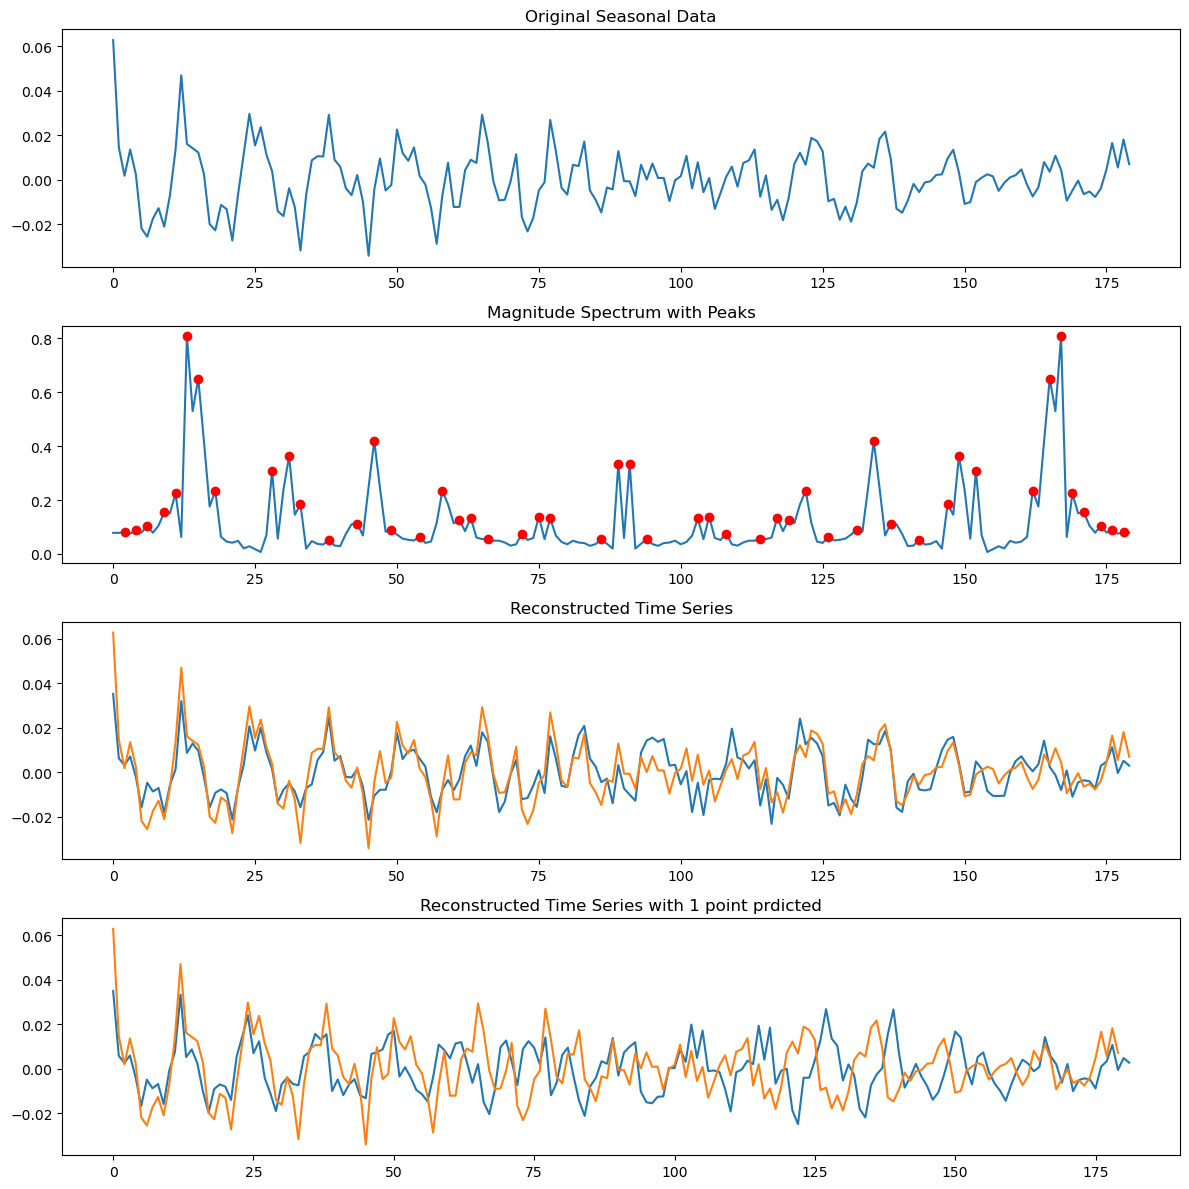

In [375]:
# Plot the results
plt.figure(figsize=(12, 12))

plt.subplot(4, 1, 1)
plt.plot(seasonal_for_fourier)
plt.title('Original Seasonal Data')

plt.subplot(4, 1, 2)
plt.plot(np.abs(fft_result))
plt.plot(filtered_peaks, magnitude_spectrum[filtered_peaks], 'ro')  # Highlight peaks
plt.title('Magnitude Spectrum with Peaks')

plt.subplot(4, 1, 3)
plt.plot(reconstructed_time_series)
plt.plot(seasonal_for_fourier)
plt.title('Reconstructed Time Series')

plt.subplot(4, 1, 4)
plt.plot(reconstructed_time_series_1_point_predicted)
plt.plot(seasonal_for_fourier)
plt.title('Reconstructed Time Series with 1 point prdicted')

plt.tight_layout()
plt.show()

In [376]:
# Size of reconstructed_time_series
size_reconstructed_time_series = len(reconstructed_time_series)
print("Size of Reconstructed Time Series:", size_reconstructed_time_series)

# Size of magnitude_spectrum
size_magnitude_spectrum = len(magnitude_spectrum)
print("Size of Magnitude Spectrum:", size_magnitude_spectrum)

# Size of seasonal_for_fourier
size_seasonal_for_fourier = len(seasonal_for_fourier)
print("Size of Original Seasonal Data:", size_seasonal_for_fourier)

# Size of seasonal_for_fourier
size_padded_signal = len(padded_signal)
print("Size of padded_signal :", size_padded_signal)

# Size of seasonal_for_fourier
size_reconstructed_time_series_1_point_predicted = len(reconstructed_time_series_1_point_predicted)
print("Size of reconstructed_time_series_1_point_predicted:", size_reconstructed_time_series_1_point_predicted)

Size of Reconstructed Time Series: 180
Size of Magnitude Spectrum: 180
Size of Original Seasonal Data: 180
Size of padded_signal : 182
Size of reconstructed_time_series_1_point_predicted: 182


In [377]:
# Make sure both arrays have the same length (up to the 180th point)
reconstructed_time_series_1_point_predicted_to_get_factor = reconstructed_time_series_1_point_predicted[:len(seasonal_for_fourier)]

# Divide each element of seasonal_for_fourier by the corresponding element of reconstructed_time_series
seasonal_noice_1 = seasonal_for_fourier - reconstructed_time_series

# Divide each element of seasonal_for_fourier by the corresponding element of size_reconstructed_time_series_1_point_predicted
seasonal_noice_2 = seasonal_for_fourier - reconstructed_time_series_1_point_predicted_to_get_factor


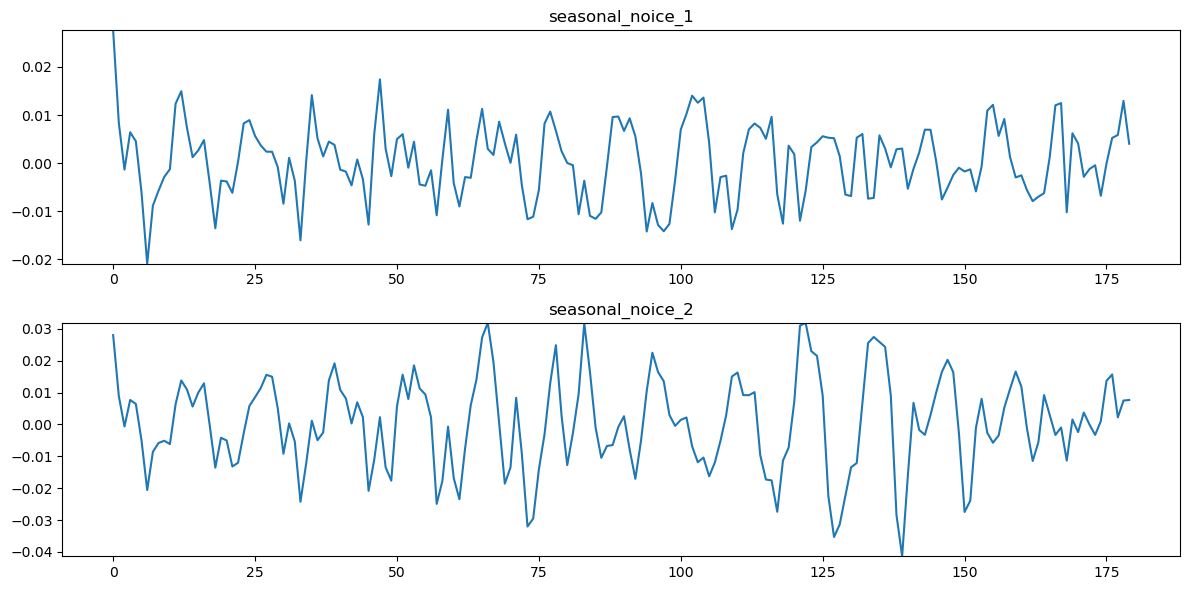

In [378]:
# Plot the results
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(seasonal_noice_1)
plt.title('seasonal_noice_1')
plt.ylim(min(seasonal_noice_1), max(seasonal_noice_1))  # Set y-axis limits

plt.subplot(2, 1, 2)
plt.plot(seasonal_noice_2)
plt.title('seasonal_noice_2')
plt.ylim(min(seasonal_noice_2), max(seasonal_noice_2))  # Set y-axis limits

plt.tight_layout()
plt.show()

In [379]:
# Perform Augmented Dickey-Fuller test
result = adfuller(seasonal_noice_1)

# Extract and print the results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: -4.580467185850389
p-value: 0.00014031182302321808
Critical Values: {'1%': -3.470126426071447, '5%': -2.8790075987120027, '10%': -2.5760826967621644}


In [380]:
# Perform Augmented Dickey-Fuller test
result = adfuller(seasonal_noice_2)

# Extract and print the results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: -7.411269671267798
p-value: 7.123714636200973e-11
Critical Values: {'1%': -3.470126426071447, '5%': -2.8790075987120027, '10%': -2.5760826967621644}


# AUTO ARIMA to the seasonal noice 1

In [566]:
acf_result_seasonal_noice_1 = sm.tsa.acf(seasonal_noice_1, fft=False)
pacf_result_seasonal_noice_1 = sm.tsa.pacf(seasonal_noice_1)

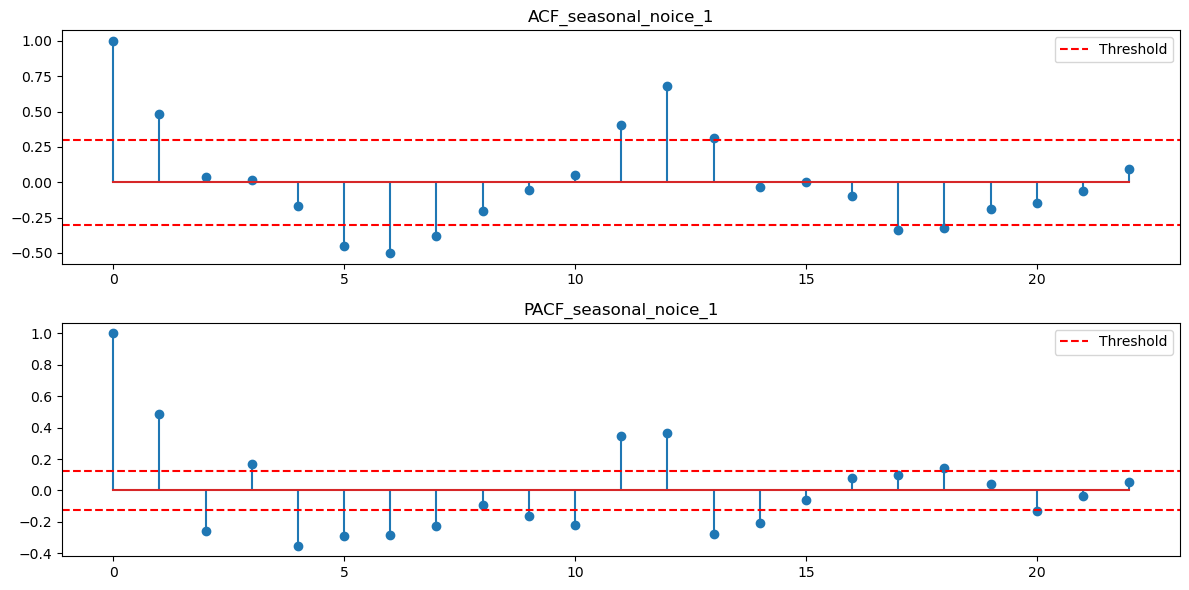

In [567]:
# Set the threshold values
acf_threshold_seasonal_noice_1 = 0.3  # Replace with your chosen threshold for ACF
pacf_threshold_seasonal_noice_1 = 0.125  # Replace with your chosen threshold for PACF

# Plot ACF and PACF with threshold lines
plt.figure(figsize=(12, 6))

# ACF Plot
plt.subplot(2, 1, 1)
plt.stem(acf_result_seasonal_noice_1)
plt.axhline(y=acf_threshold_seasonal_noice_1, color='r', linestyle='--', label='Threshold')
plt.axhline(y=-acf_threshold_seasonal_noice_1, color='r', linestyle='--')
plt.title('ACF_seasonal_noice_1')
plt.legend()

# PACF Plot
plt.subplot(2, 1, 2)
plt.stem(pacf_result_seasonal_noice_1)
plt.axhline(y=pacf_threshold_seasonal_noice_1, color='r', linestyle='--', label='Threshold')
plt.axhline(y=-pacf_threshold_seasonal_noice_1, color='r', linestyle='--')
plt.title('PACF_seasonal_noice_1')
plt.legend()

plt.tight_layout()
plt.show()

In [569]:
absolute_acf_result_seasonal_noice_1 = np.abs(acf_result_seasonal_noice_1)
absolute_pacf_result_seasonal_noice_1 = np.abs(pacf_result_seasonal_noice_1)

relevant_acf_points_seasonal_noice_1 = np.where(absolute_acf_result_seasonal_noice_1 > acf_threshold_seasonal_noice_1)[0]
relevant_pacf_points_seasonal_noice_1 = np.where(absolute_pacf_result_seasonal_noice_1 > pacf_threshold_seasonal_noice_1)[0]

print("Relevant ACF Points:", relevant_acf_points_seasonal_noice_1)
print("Relevant PACF Points:", relevant_pacf_points_seasonal_noice_1)

Relevant ACF Points: [ 0  1  5  6  7 11 12 13 17 18]
Relevant PACF Points: [ 0  1  2  3  4  5  6  7  9 10 11 12 13 14 18 20]


In [570]:
last_acf_point_seasonal_noice_1 = relevant_acf_points_seasonal_noice_1[-1]
last_pacf_point_seasonal_noice_1 = relevant_pacf_points_seasonal_noice_1[-1]

print("Last ACF Point above Threshold:", last_acf_point_seasonal_noice_1)
print("Last PACF Point above Threshold:", last_pacf_point_seasonal_noice_1)

Last ACF Point above Threshold: 18
Last PACF Point above Threshold: 20


In [571]:
# Assuming you have a variable named 'residual_additive'
# If 'residual_additive' is a NumPy array or a Pandas DataFrame/Series
total_samples_seasonal_noice_1 = len(seasonal_noice_1)

# Set the percentage for training and testing
train_percentage_seasonal_noice_1 = 0.9

# Calculate the number of samples for training
train_samples_seasonal_noice_1 = int(train_percentage_seasonal_noice_1 * total_samples_seasonal_noice_1)

# Split the data into training and testing sets
train_set_seasonal_noice_1 = seasonal_noice_1[:train_samples_seasonal_noice_1]
test_set_seasonal_noice_1 = seasonal_noice_1[train_samples_seasonal_noice_1:]

# Example usage:
print("Training set shape:", train_set_seasonal_noice_1.shape)
print("Testing set shape:", test_set_seasonal_noice_1.shape)

Training set shape: (162,)
Testing set shape: (18,)


In [574]:
train_set_seasonal_noice_1

array([ 2.76179351e-02,  8.35326031e-03, -1.34260207e-03,  6.42716143e-03,
        4.54425577e-03, -6.10866577e-03, -2.09213456e-02, -8.83862495e-03,
       -5.70543799e-03, -2.85587891e-03, -1.25439167e-03,  1.23588127e-02,
        1.49606811e-02,  7.38043294e-03,  1.24978947e-03,  2.66584229e-03,
        4.79126258e-03, -4.05829979e-03, -1.35360832e-02, -3.62934907e-03,
       -3.81342684e-03, -6.17386239e-03,  2.68026180e-04,  8.26708295e-03,
        8.94900423e-03,  5.66072578e-03,  3.69702404e-03,  2.38641286e-03,
        2.37961854e-03, -8.26325750e-04, -8.43756474e-03,  1.10816515e-03,
       -3.66472059e-03, -1.60430494e-02,  2.91919561e-04,  1.41485839e-02,
        5.16522027e-03,  1.39638293e-03,  4.48441182e-03,  3.79384093e-03,
       -1.34534889e-03, -1.76335124e-03, -4.62033643e-03,  7.60616613e-04,
       -3.34454728e-03, -1.27767917e-02,  6.08674840e-03,  1.74291488e-02,
        3.04204507e-03, -2.70362443e-03,  4.99772751e-03,  6.02380141e-03,
       -9.45954231e-04,  

In [576]:
test_set_seasonal_noice_1

array([-7.90734566e-03, -6.97687389e-03, -6.24903288e-03,  1.27768476e-03,
        1.20291374e-02,  1.24850802e-02, -1.02065597e-02,  6.21248740e-03,
        4.10555224e-03, -2.84312959e-03, -1.23608495e-03, -4.36994910e-04,
       -6.79004027e-03, -7.82270782e-05,  5.23998106e-03,  5.86159898e-03,
        1.29438153e-02,  4.03223645e-03])

In [577]:
model_seasonal_noice_1 = pm.auto_arima(train_set_seasonal_noice_1, start_p=3, start_q=3,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=last_acf_point_seasonal_noice_1, max_q=last_pacf_point_seasonal_noice_1, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model_seasonal_noice_1.summary())

Performing stepwise search to minimize aic
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=-1215.771, Time=0.25 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-1116.948, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-1165.253, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-1194.423, Time=0.05 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=-1222.584, Time=0.21 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=-1207.175, Time=0.18 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-1191.495, Time=0.17 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=-1206.089, Time=0.29 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-1193.083, Time=0.15 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=-1204.402, Time=0.30 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=-1190.417, Time=0.24 sec
 ARIMA(3,0,4)(0,0,0)[0]             : AIC=-1227.500, Time=0.27 sec
 ARIMA(4,0,4)(0,0,0)[0]             : AIC=-1234.263, Time=0.11 sec
 ARIMA(4,0,3)(0,0,0)[0]             : AIC=-1236.589, Time=0.25 sec
 ARIMA(4,0,2)(0,0,0

In [580]:
model_seasonal_noice_1

ARIMA(order=(6, 0, 3), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [581]:
# Get the best-fit parameters
order_seasonal_noice_1 = model_seasonal_noice_1.get_params()['order']

# Retrain the ARIMA model with the best parameters
arima_model_seasonal_noice_1 = ARIMA(train_set_seasonal_noice_1, order=order)
fitted_model_seasonal_noice_1 = arima_model_seasonal_noice_1.fit()

# Forecast future values
forecast_values_seasonal_noice_1 = fitted_model_seasonal_noice_1.forecast(len(test_set_seasonal_noice_1))  # Change 'steps' to the number of future steps you want to forecast

print("Forecasted values:", forecast_values_seasonal_noice_1)

Forecasted values: [-2.92011314e-03 -8.44694392e-06  1.17689272e-03  1.08462192e-03
  6.41780811e-04  3.58964640e-04  3.00705832e-04  3.49768381e-04
  4.02927805e-04  4.24770775e-04  4.23228403e-04  4.15179270e-04
  4.09995822e-04  4.08906622e-04  4.09790728e-04  4.10761210e-04
  4.11163668e-04  4.11138113e-04]


In [582]:
# Perform Augmented Dickey-Fuller test
result_seasonal_noice_1 = adfuller(forecast_values_seasonal_noice_1)

# Extract and print the results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: -1046555074781340.5
p-value: 0.0
Critical Values: {'1%': -4.223238279489106, '5%': -3.189368925619835, '10%': -2.729839421487603}


In [583]:
#get the error
residuals_seasonal_noice_1 = test_set_seasonal_noice_1-forecast_values_seasonal_noice_1

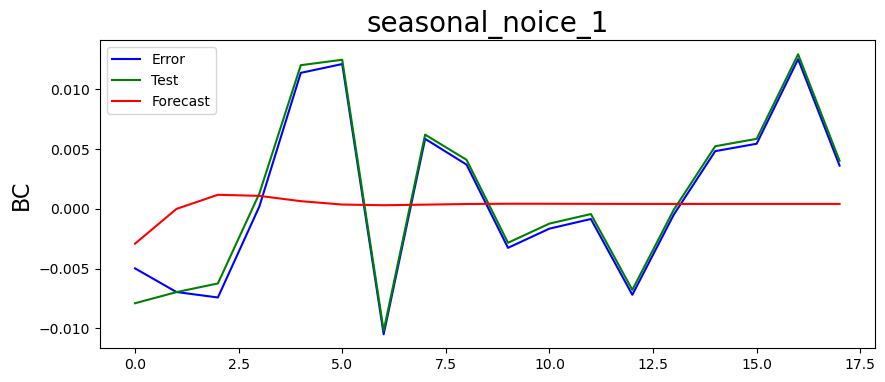

In [586]:
plt.figure(figsize=(10, 4))
plt.plot(residuals_seasonal_noice_1, "b", label="Error")
plt.plot(test_set_seasonal_noice_1, "g", label="Test")
plt.plot(forecast_values_seasonal_noice_1, "r", label="Forecast")
plt.title('seasonal_noice_1', fontsize=20)
plt.ylabel('BC', fontsize=16)
plt.legend()  # Add legend for labels
plt.show()

# Classical seasonal decompomposition of the seasonal part does NOT give satisfing results

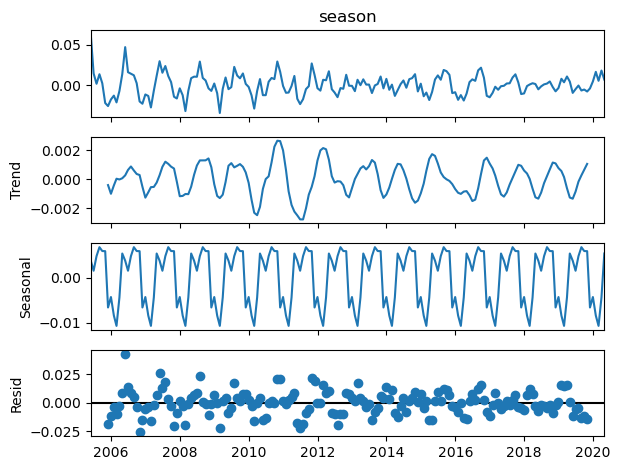

In [381]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(seasonal_additive, model='additive')
result.plot()
plt.show()

In [382]:
seasonal_2, trend_2, residual_2 = result.seasonal , result.trend , result.resid

# Drop rows with empty points (NaN values)
residual_2.dropna(inplace=True)

# Perform Augmented Dickey-Fuller test
result = adfuller(residual_2)

# Extract and print the results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: -7.758892841883515
p-value: 9.572019675210724e-12
Critical Values: {'1%': -3.473829775724492, '5%': -2.880622899711496, '10%': -2.5769448985432954}


## Multiplicative Decomposition

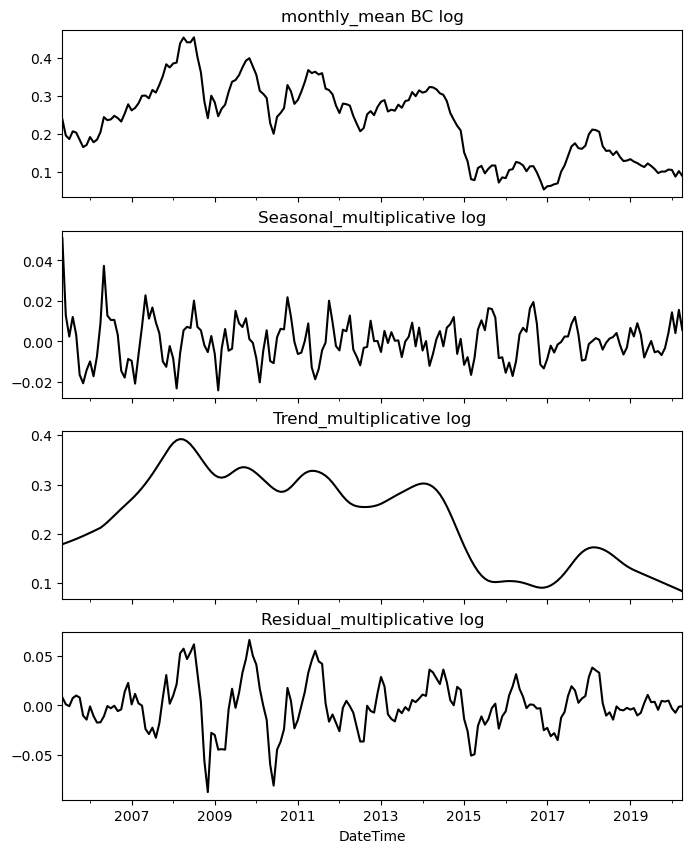

In [383]:
monthly_mean_log = np.log(monthly_mean)

stl = STL(monthly_mean_log)
result = stl.fit()

seasonal_multiplicative, trend_multiplicative, residual_multiplicative = result.seasonal , result.trend , result.resid

#Plot the original time series, trend, seasonal and random components
fig, axarr = plt.subplots(4, sharex=True)
fig.set_size_inches(8, 10)

monthly_mean_log.plot(ax=axarr[0], color='k', linestyle='-')
axarr[0].set_title('monthly_mean BC log')

seasonal_multiplicative.plot(ax=axarr[1], color='k', linestyle='-')
axarr[1].set_title('Seasonal_multiplicative log')

trend_multiplicative.plot(ax=axarr[2], color='k', linestyle='-')
axarr[2].set_title('Trend_multiplicative log')

residual_multiplicative.plot(ax=axarr[3], color='k', linestyle='-')
axarr[3].set_title('Residual_multiplicative log')

plt.savefig('plots/ch2/B07887_02_22.png', format='png', dpi=300)

In [384]:
# Perform Augmented Dickey-Fuller test
result = adfuller(residual_multiplicative)

# Extract and print the results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: -3.8794966438304264
p-value: 0.002191030628142102
Critical Values: {'1%': -3.470616369591229, '5%': -2.8792214018977655, '10%': -2.57619681359045}


# AUTO ARIMA for additive decomposition residuals

In [385]:
!pip install pmdarima

In [399]:
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm

model = pm.auto_arima(residual_additive, start_p=3, start_q=3,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=10, max_q=10, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=inf, Time=0.31 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-708.963, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-891.304, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-849.561, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-911.470, Time=0.06 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=-909.470, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-909.471, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-910.695, Time=0.06 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=inf, Time=0.18 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-909.477, Time=0.09 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0]          
Total fit time: 0.953 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  180
Model:               SARIMAX(2, 0, 0)   Log Likelihood                 4

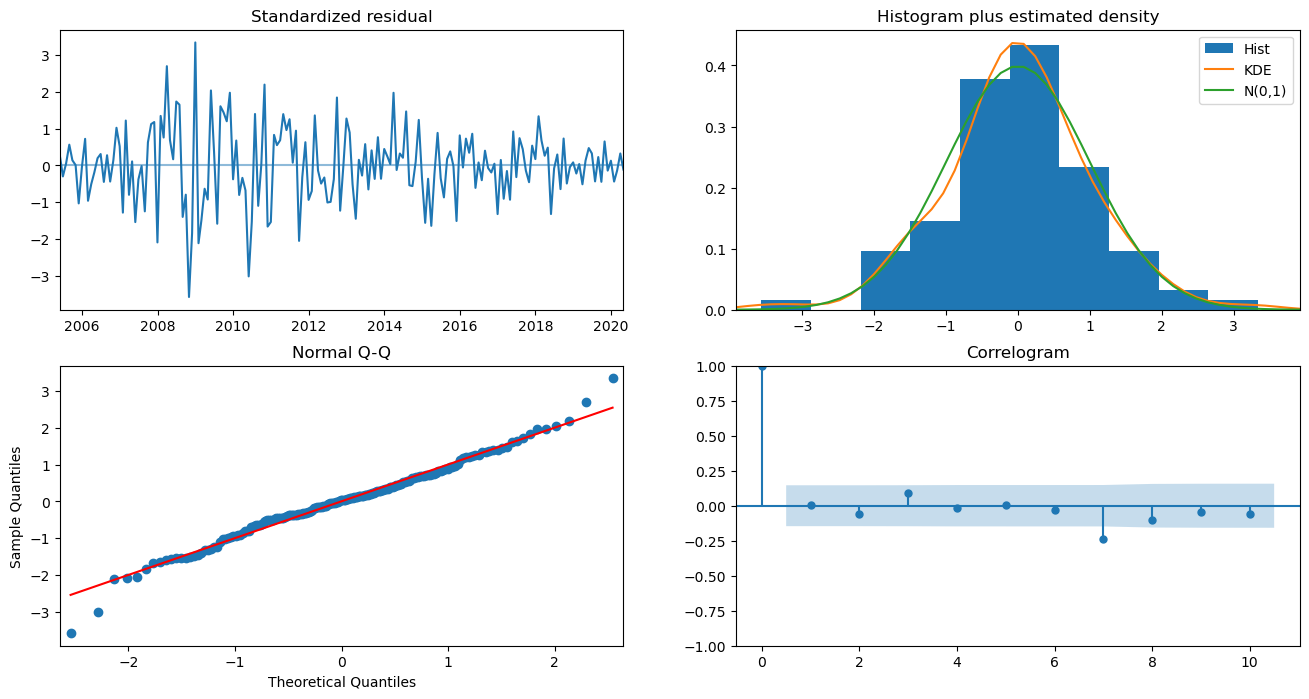

In [387]:
model.plot_diagnostics(figsize=(16,8))
plt.show()

In [388]:
model

ARIMA(order=(2, 0, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [389]:
# Get the best-fit parameters
order = model.get_params()['order']

# Retrain the ARIMA model with the best parameters
arima_model = ARIMA(residual_additive, order=order)
fitted_model = arima_model.fit()

# Forecast future values
forecast_values = fitted_model.forecast(steps=5)  # Change 'steps' to the number of future steps you want to forecast

print("Forecasted values:", forecast_values)

Forecasted values: 2020-05-31   -0.000487
2020-06-30   -0.000022
2020-07-31    0.000258
2020-08-31    0.000400
2020-09-30    0.000458
Freq: M, Name: predicted_mean, dtype: float64


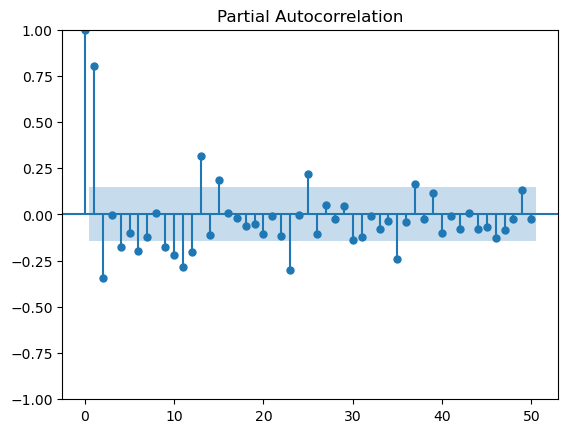

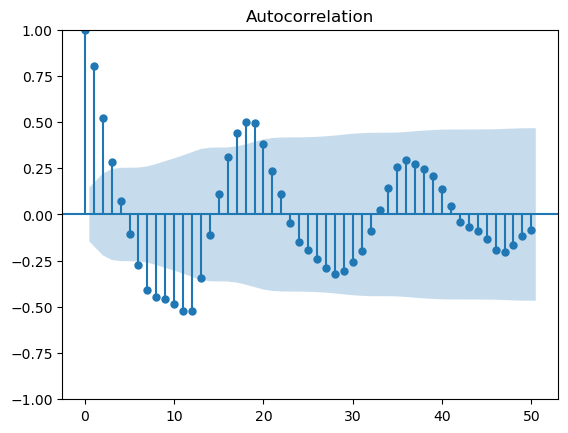

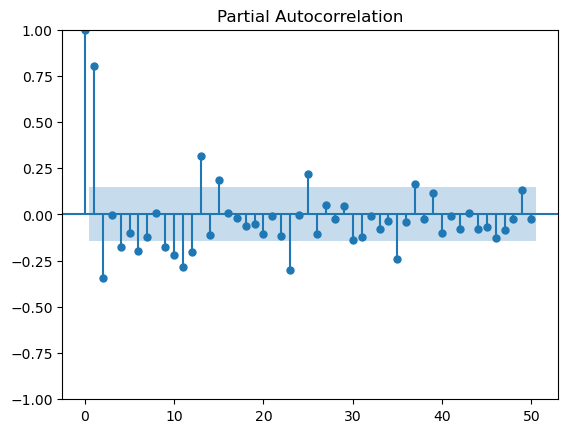

In [402]:
plot_acf(residual_additive, lags=50)
plot_pacf(residual_additive, lags=50)

# AUTO ARIMA for additive decomposition seasonal noice

In [392]:

model_seasonal_noice = pm.auto_arima(seasonal_noice_1, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=10, max_q=10, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model_seasonal_noice.summary())

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-1243.698, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-1293.053, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-1319.112, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-1317.684, Time=0.06 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-1318.853, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-1317.301, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-1317.529, Time=0.04 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0]          
Total fit time: 0.389 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  180
Model:               SARIMAX(0, 0, 1)   Log Likelihood                 661.556
Date:                Tue, 09 Jan 2024   AIC                          -1319.112
Time:                        14:14:11   BIC                          -1312.726
Sample:         

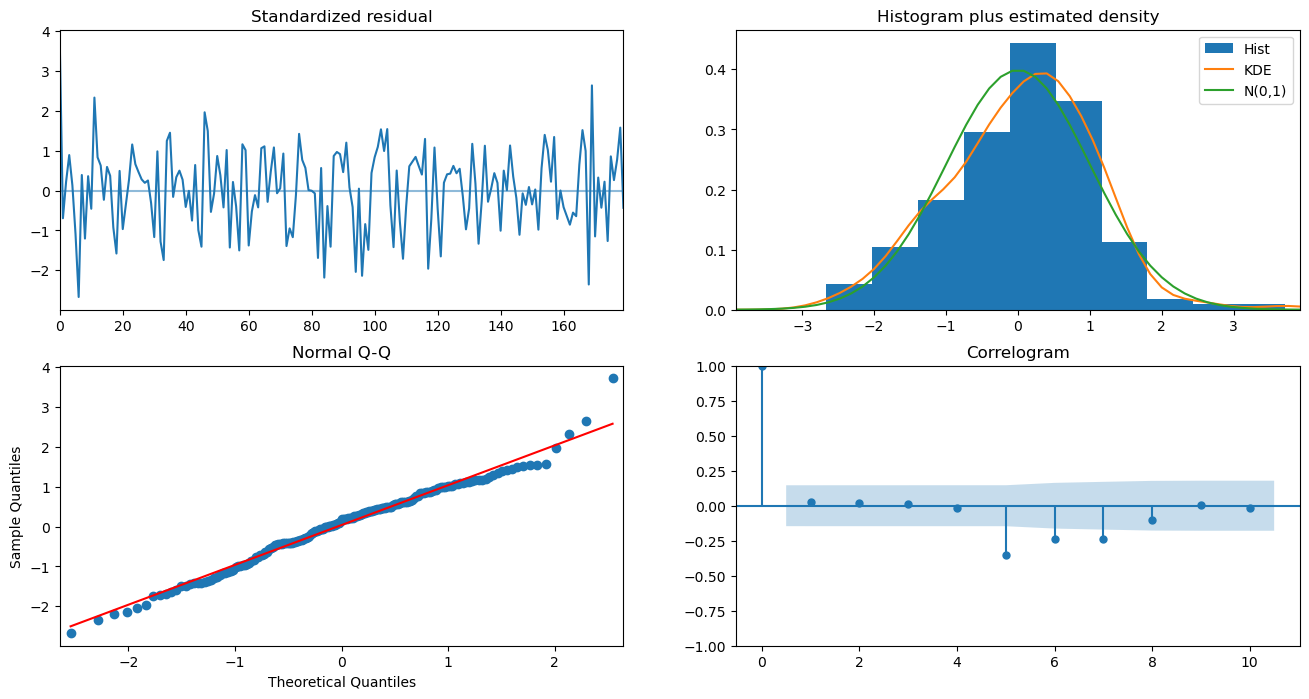

In [393]:
model_seasonal_noice.plot_diagnostics(figsize=(16,8))
plt.show()

In [394]:
model_seasonal_noice

ARIMA(order=(0, 0, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [398]:
# Get the best-fit parameters
order = model_seasonal_noice.get_params()['order']

# Retrain the ARIMA model with the best parameters
arima_model = ARIMA(seasonal_noice_1, order=order)
fitted_model = arima_model.fit()

# Forecast future values
forecast_values = fitted_model.forecast(steps=5)  # Change 'steps' to the number of future steps you want to forecast

print("Forecasted values:", forecast_values)

Forecasted values: [-0.00151927  0.00049011  0.00049011  0.00049011  0.00049011]


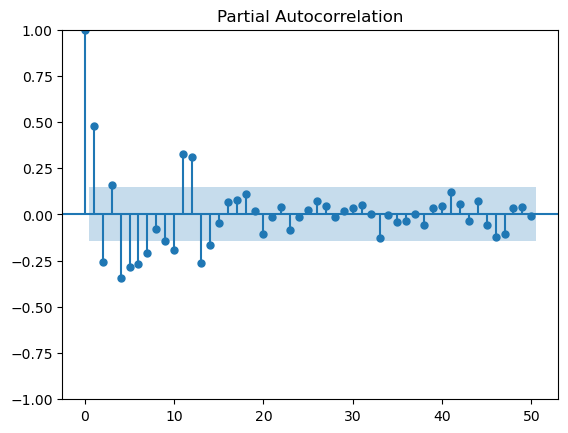

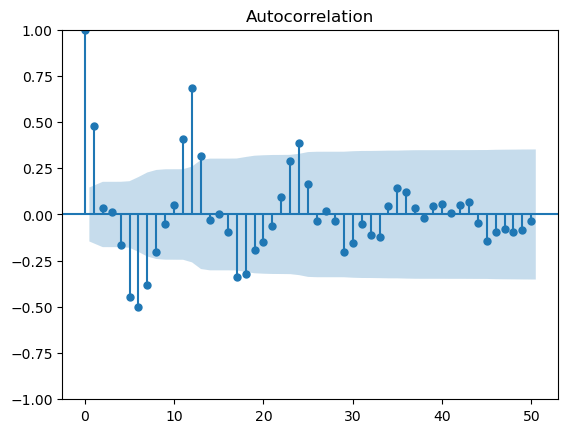

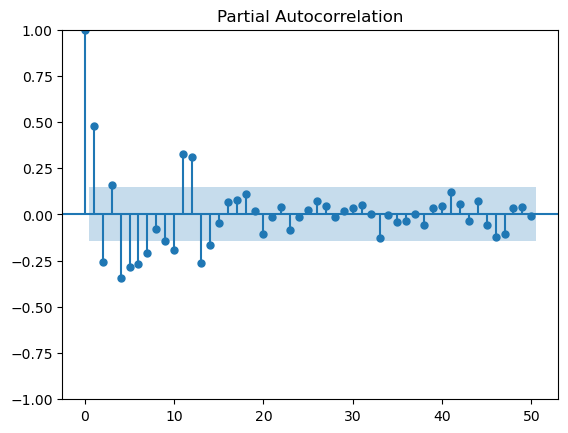

In [403]:
plot_acf(seasonal_noice_1, lags=50)
plot_pacf(seasonal_noice_1, lags=50)